<a href="https://colab.research.google.com/github/jatbhoir/Machine-Learning/blob/master/ML_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#Q1.
---

In [29]:
data = {
    'Bill': [52.44, 70.29, 106.27, 49.72, 43.58, 88.01],
    'Tip': [7, 10, 16, 5.28, 5.5, 10]
}
data = pd.DataFrame(data)
data.T

,0,1,2,3,4,5
Bill,52.44,70.29,106.27,49.72,43.58,88.01
Tip,7.00,10.00,16.00,5.28,5.50,10.00


In [30]:
mean_X = np.mean(data['Bill'])
mean_Y = np.mean(data['Tip'])
print(mean_X)

68.385


In [31]:
data['X-Xm'] = data['Bill'] - mean_X
data['Y-Ym'] = data['Tip'] - mean_Y
data['XY'] = data['X-Xm'] * data['Y-Ym']
data['(X-Xm)^2'] = data['X-Xm'] ** 2
data

,Bill,Tip,X-Xm,Y-Ym,XY,(X-Xm)^2
0,52.44,7.00,-15.945,-1.963333,31.305350,254.243025
1,70.29,10.00,1.905,1.036667,1.974850,3.629025
2,106.27,16.00,37.885,7.036667,266.584117,1435.273225
3,49.72,5.28,-18.665,-3.683333,68.749417,348.382225
4,43.58,5.50,-24.805,-3.463333,85.907983,615.288025
5,88.01,10.00,19.625,1.036667,20.344583,385.140625


In [32]:
slope = data['XY'].sum() / data['(X-Xm)^2'].sum()
intercept = mean_Y - slope * mean_X
print(f'Slope (A): {slope:.3f}')
print(f'Intercept (B): {intercept:.3f}')

Slope (A): 0.156
Intercept (B): -1.712


In [33]:
# Estimating Tip if Bill is $70
bill = 70
tip = slope * bill + intercept
print(f'Tip (70): {tip:.3f}')

Tip (70): 9.215


#Q2.
---

In [34]:
data = {
    'X': [9, 10, 11, 12, 13, 14, 15, 16],
    'Y' : [-4, -3, -1, 0, 1, 3, 5, 8]
}
data = pd.DataFrame(data)
data.T

,0,1,2,3,4,5,6,7
X,9,10,11,12,13,14,15,16
Y,-4,-3,-1,0,1,3,5,8


Without Sklearn

---

Calculating Correlation

In [35]:
correlation = data['X'].corr(data['Y'])
print(f'Correlation between x and y: {correlation:.3f}')

Correlation between x and y: 0.986


<Axes: >

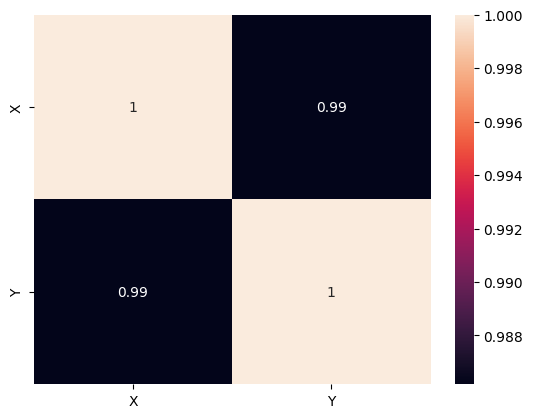

In [36]:
sns.heatmap(data = data.corr(), annot = True)

Slope and Intercept

In [37]:
mean_X = data['X'].mean() # alternative way np.mean(data[‘X’])
mean_Y = data['Y'].mean()

In [38]:
numerator = sum((data['X'] - mean_X) * (data['Y'] - mean_Y))
denominator = sum((data['X'] - mean_X) ** 2)

In [39]:
slope = numerator / denominator
intercept = mean_Y - (slope * mean_X)
print(f'Slope (A): {slope:.3f}')
print(f'Intercept (B): {intercept:.3f}')

Slope (A): 1.631
Intercept (B): -19.262


Regression Metrics

In [40]:
predicted_y = slope * data['X'] + intercept
residuals = data['Y'] - predicted_y

In [41]:
mse = np.mean(residuals ** 2)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.3f}')
print(f'Root Mean Squared Error: {rmse:.3f}')

Mean Squared Error: 0.394
Root Mean Squared Error: 0.628


Estimating y for x = 14.5

In [42]:
x_new = 14.5
y_new = slope * x_new + intercept
print(f'Estimated y: {y_new:.3f}')

Estimated y: 4.387


With Sklearn

---

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Linear Regression Model

In [81]:
x, y = data[['X']], data['Y']
LR = LinearRegression().fit(x, y)
y_pred = LR.predict(x)
residuals = y - y_pred

Slope and Intercept

In [45]:
slope_sklearn = LR.coef_[0]
intercept_sklearn = LR.intercept_
print(f'Slope (Sklearn A): {slope_sklearn:.3f}, Intercept (Sklearn B): {intercept_sklearn:.3f}')

Slope (Sklearn A): 1.631, Intercept (Sklearn B): -19.262


Regression Assumption

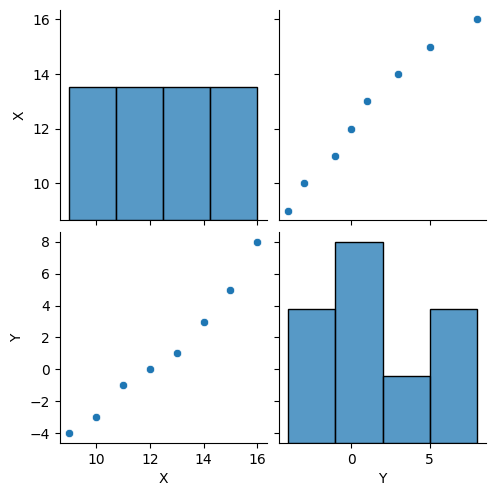

In [87]:
# Linearity
sns.pairplot(data = data, kind = 'scatter', )
# sns.pairplot(data = data, x_vars=['X'], y_vars=['Y'], kind = 'scatter', height = 3)

<Axes: ylabel='Y'>

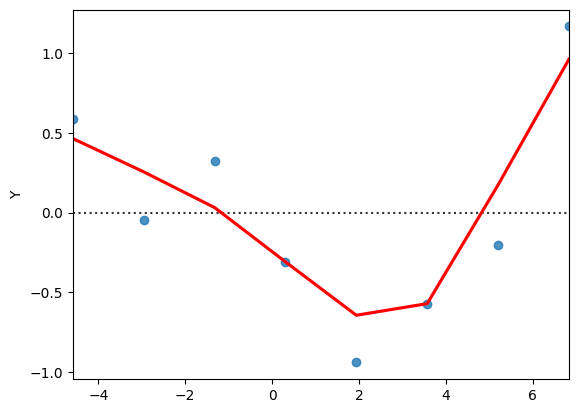

In [58]:
# Homoscedasticity
sns.residplot(x = y_pred, y = y, lowess = True, line_kws = {'color': 'red'})

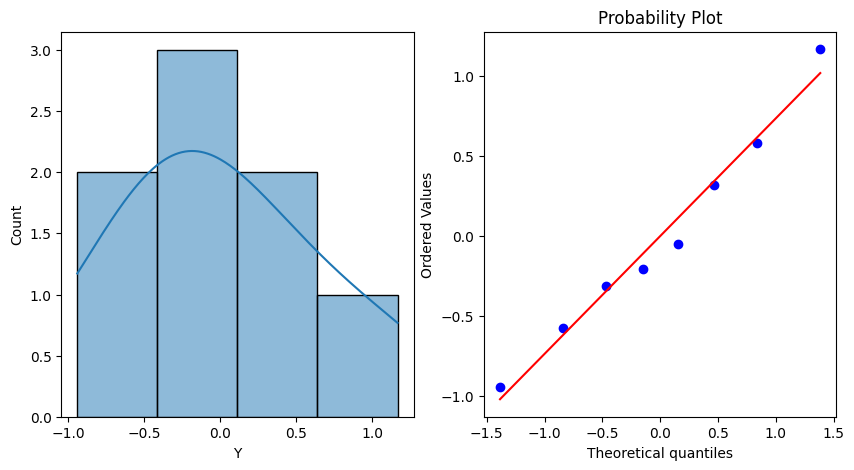

ShapiroResult(statistic=0.974858283996582, pvalue=0.933165431022644)

In [96]:
# Normality
import scipy.stats as stats

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
# Using Histogram
sns.histplot(data = residuals, kde = True, ax = axes[0])
# Using Q-Q plot
stats.probplot(x = residuals, dist = 'norm', plot = plt)
plt.show()

# Shapiro-Wilk Test
stats, p_value = stats.shapiro(x)
print(f'\nStats: {stats:.3f}, Sig.: {p_value:.3f}')

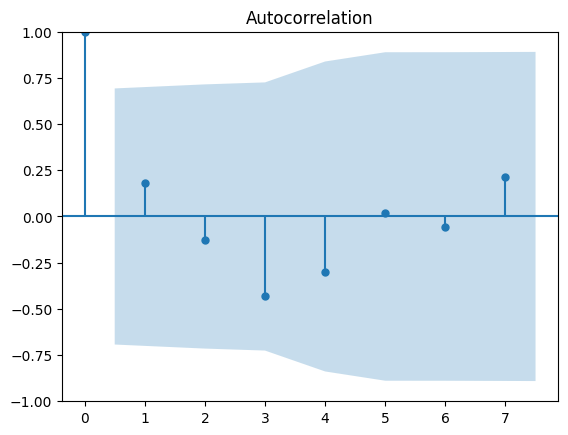

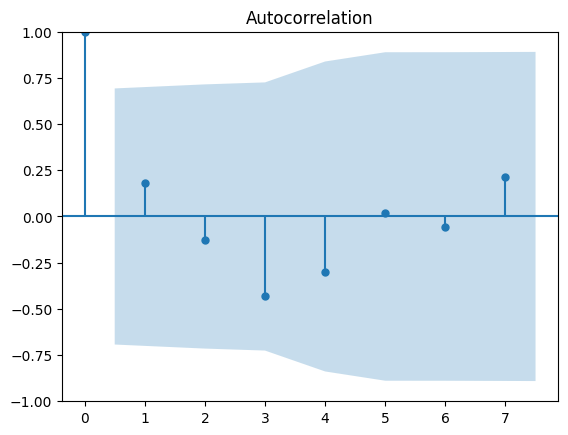

In [76]:
# Auto-correlation / Independence
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals, lags = 7)

<Axes: >

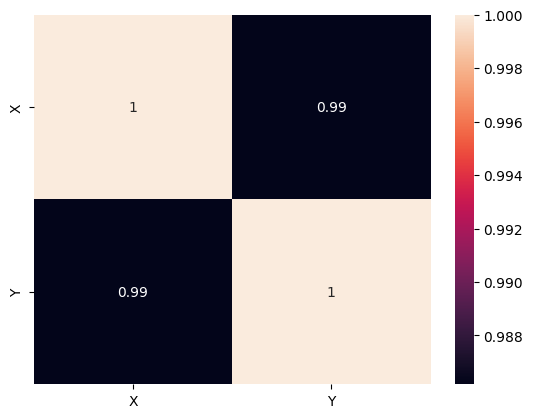

In [104]:
# Multi-Colinearity
corr = data.corr(method = 'pearson')
sns.heatmap(corr, annot = True)

Regression Metrics

In [51]:
mse_sklearn = mean_squared_error(y, y_pred)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y, y_pred)
print(f'Mean Squared Error (Sklearn): {mse_sklearn:.3f}, \nRoot Mean Squared Error (Sklearn): {rmse_sklearn:.3f}, \nR2 Score (Sklearn): {r2_sklearn:.3f}')

Mean Squared Error (Sklearn): 0.394, 
Root Mean Squared Error (Sklearn): 0.628, 
R2 Score (Sklearn): 0.973


Estimating y for x = 14.5

In [52]:
y_new_sklearn = LR.predict([[14.5]])
print(f'Estimated y (Sklearn): {y_new_sklearn[0]:.3f}')

Estimated y (Sklearn): 4.387
